# Modelo de Predição de Churn

## Introdução
Um banco está fazendo uma campanha de marketing e quer prever quais clientes vão aderir a um investimento que está sendo oferecido a eles. Com isso, o banco pode ser mais eficiente e contatar os clientes que realmente terão interesse. 

## Objetivos
Para solucionar o problema de negócio, realizaremos um estudo dos dados históricos da campanha de marketing anterior para extrair insights e criar um modelo de machine learning que consiga realizar previsões de clientes que vão aderir ou não ao investimento.

## Bibliotecas

In [1]:
import pandas as pd
import plotly.express as px
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

## Carregando os dados

In [2]:
dados = pd.read_csv('Dados/marketing_investimento.csv')
dados.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


## Análise Exploratória dos dados

### Aderência de investimento
No primeiro gráfico, podemos perceber que a quantidade de pessoas que investem é menor. 

In [4]:
px.histogram(dados, x='aderencia_investimento', text_auto=True)

### Estado civil
Ao analisar o próximo gráfico, notamos que as pessoas casadas tendem a não aderir ao investimento, enquanto há um certo equilíbrio nos valores de adesão e não adesão de investimento entre as pessoas divorciadas e solteiras.

In [5]:
px.histogram(dados, x='estado_civil', text_auto=True, color='aderencia_investimento', barmode='group')

### Escolaridade

Quanto a escolaridade, podemos perceber que os valores referente adesão de investimento entre as pessoas que concluíram o ensino superior é equilibrado, enquanto em relação aos que concluíram até o ensino médio ou fundamental existe uma variação muito maior entre as quantidades de cada categoria.

In [6]:
px.histogram(dados, x='escolaridade', text_auto=True, color='aderencia_investimento', barmode='group')

### Inadimplência

Podemos identificar que existem poucos valores "sim" e muitos valores "não" e há uma grande diferença proporcional nos valores de "não". Para o valor "sim", a proporção dos dados é bem próxima, mas com poucos valores de "sim".

In [7]:
px.histogram(dados, x='inadimplencia', text_auto=True, color='aderencia_investimento', barmode='group')

### Emprestimo

Semelhante ao gráfico anterior, podemos notar que a maioria das pessoas que investiram não realizaram empréstimo. 

In [8]:
px.histogram(dados, x='fez_emprestimo', text_auto=True, color='aderencia_investimento', barmode='group')

### Idade

Ao analisar o gráfico, podemos observar que a idade dos clientes varia de 19 a 87 anos. 

In [9]:
px.box(dados, x='idade', color='aderencia_investimento')

### Saldo

Quanto ao gráfico referente o saldo, temos muito mais pontos fora da curva, porém, não há uma diferença tão grande na distribuição da aderência de investimento entre as duas caixas, sendo possível notar que o valor do saldo está mais concentrado para valores menores de saldo.

O valor mínimo do saldo é -1.206 e o valor máximo é de 27.069. Por tratar-se de dados que não estão "fora" da realidade, consideramos que não há inconsistências nos dados.

In [10]:
px.box(dados, x='saldo', color='aderencia_investimento')

### Tempo de último contato

No gráfico abaixo, podemos notaque que tem uma diferença na distribuição dos valores. No boxplot vermelho, que se refere a não aderência do investimento, temos valores mais concentrados em tempos menores. Já no azul, de aderência ao investimento, há valores maiores do tempo.

In [11]:
px.box(dados, x='tempo_ult_contato', color='aderencia_investimento')

### Número de contatos

Por fim, no gráfico referente o número de contatos, a distribuição de valores estão bem semelhantes.

In [12]:
px.box(dados, x='numero_contatos', color='aderencia_investimento')

## Criação do modelo
### Separação das variáveis para classificação

In [13]:
# Definindo features e target
X = dados.drop(columns=['aderencia_investimento'], axis=1)
y = dados['aderencia_investimento']

### Transformando as variáveis categóricas

#### Features

In [14]:
# Definindo as colunas para aplicar o OneHotEncoder.
colunas = X.columns

# Instanciando o OneHotEncoder
ohe = make_column_transformer((OneHotEncoder(drop='if_binary'), # drop='if_binary' remove uma das colunas binárias
                              ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']), # colunas a serem transformadas
                               remainder='passthrough', # mantém as colunas que não foram transformadas
                               sparse_threshold=0 # retorna um array numpy e não uma matriz esparsa
                              )

# Aplicando o OneHotEncoder
X = ohe.fit_transform(X)

# Transformando o array numpy em DataFrame
pd.DataFrame(X, columns=ohe.get_feature_names_out(colunas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


#### Target

In [15]:
# Instanciando o LabelEncoder
le = LabelEncoder()

# Aplicando o LabelEncoder
y = le.fit_transform(y)

### Divisão dos dados para treino e teste

In [16]:
# Dividindo os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, stratify=y, test_size=0.2, random_state=5)

### Modelagem - DummyClassifier

Após separar os dados de teste, definimos um baseline utilizando DummyClassifier que retornou acerto de 60%.

In [17]:
# Instanciando o DummyClassifier
modelo_dummy = DummyClassifier()

# Treinando o modelo
modelo_dummy.fit(X_treino, y_treino)

# Calculando a acurácia
modelo_dummy.score(X_teste, y_teste)

0.6023622047244095

### Modelagem - DecisionTreeClassifier

Ao implementar e analisar o modelo, podemos notar que a acurácia do modelo para os dados de treino é de 76%, enquanto a acurácia para os dados de teste é de 70,8%. 

In [18]:
# Instanciando o DecisionTreeClassifier
modelo_arvore = DecisionTreeClassifier(max_depth=3, random_state=5)

# Treinando o modelo
modelo_arvore.fit(X_treino, y_treino)

# Realizando previsões
modelo_arvore.predict(X_teste)

# Calculando a acurácia do modelo com os dados de treino
print(f'Acurácia (treino): {modelo_arvore.score(X_treino, y_treino) * 100}%')

# Calculando a acurácia do modelo com os dados de teste
print(f'Acurácia (teste): {modelo_arvore.score(X_teste, y_teste) * 100}%')

Acurácia (treino): 76.03550295857988%
Acurácia (teste): 70.86614173228347%


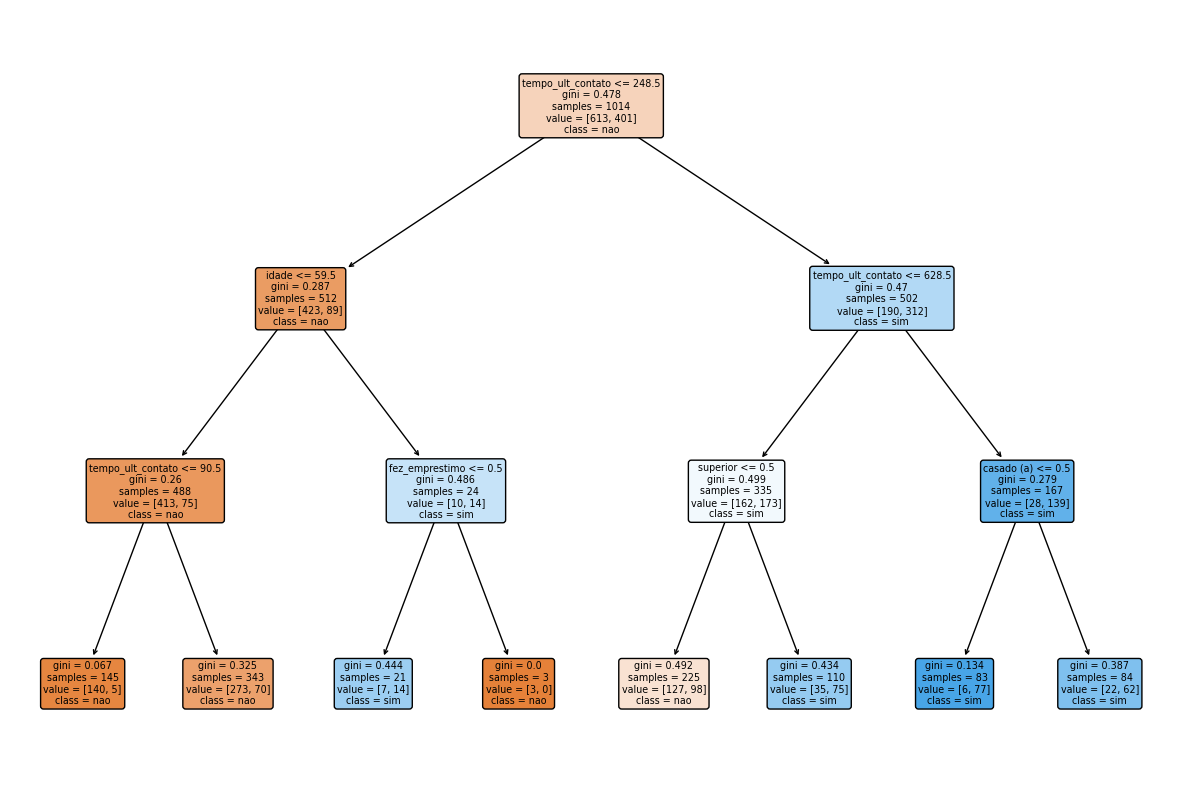

In [19]:
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']


# Plotando a árvore
plt.figure(figsize=(15, 10))
plot_tree(modelo_arvore, filled=True, feature_names=nome_colunas, class_names=['nao', 'sim'], rounded=True)
plt.show()